In [5]:
from simulation import *
from core_plugins.plot_curves import *
from math import *
import numpy as np
meterial = meterial_s
def print_meterial_s(x):pass

glass_nk = 1.5 + 0j
air_nk   = 1 + 0j
meterial
glass = meterial()
glass.nk = glass_nk
glass.depth = 0

air = meterial()
air.nk = air_nk
air.depth = 0

def test_TMM_interface_matrix(meterials, N = 90):
    print_meterial_s(meterials)
    
    step = 0.5 * pi / (N - 1)
    eps = 1e-6
    rs_power = list()
    ts_power = list()
    rp_power = list()
    tp_power = list()
    rs_real_part = list()
    ts_real_part = list()
    rp_real_part = list()
    tp_real_part = list()

    phase_rs = list()
    phase_rp = list()
    for i in range(N):
        crao = i * step + 0j
        dir = TMM_propagate_direction(meterials, crao)
        tmm = TMM_interface_transfer_matrix_s(meterials, dir)
        Rs, Ts = TMM_get_r_t_power_from_tmm_s(tmm[0], meterials[0].nk, dir[0], meterials[1].nk, dir[1])
        assert(TMM_check_power_refrection_transmission_s(Rs, Ts, eps))
        rs_power.append(Rs)
        ts_power.append(Ts)

        rs, ts = TMM_get_r_t_from_tmm(tmm[0])
        assert(TMM_check_refrection_transmission_s(rs, ts, meterials[0].nk, meterials[1].nk, eps))
        rs_real_part.append(rs.real)
        ts_real_part.append(ts.real)
        
        tmm = TMM_interface_transfer_matrix_p(meterials, dir)
        Rp, Tp = TMM_get_r_t_power_from_tmm_p(tmm[0], meterials[0].nk, dir[0], meterials[1].nk, dir[1])
        assert(TMM_check_power_refrection_transmission_p(Rp, Tp, eps))
        rp_power.append(Rp)
        tp_power.append(Tp)

        rp, tp = TMM_get_r_t_from_tmm(tmm[0])
        assert(TMM_check_refrection_transmission_p(rp, tp, meterials[0].nk, meterials[1].nk, eps))
        rp_real_part.append(rp.real)
        tp_real_part.append(tp.real)

        phase_rs.append(np.abs(np.angle(rs, deg=True)))
        phase_rp.append(np.abs(np.angle(rp, deg=True)))

    unpolarized_reflection_power = [(a+b)/2 for a,b in zip(rp_power, rs_power)]
    unpolarized_transimition_power = [(a+b)/2 for a,b in zip(tp_power, ts_power)]

    return {
        "meterials": meterials,
        "rs_power" : rs_power,
        "ts_power" : ts_power,
        "rp_power" : rp_power,
        "tp_power" : tp_power,
        "rs" : rs_real_part,
        "ts" : ts_real_part,
        "rp" : rp_real_part,
        "tp" : tp_real_part,
        "unpolarized_reflection_power" : unpolarized_reflection_power,
        "unpolarized_transimition_power" : unpolarized_transimition_power,
        "phase_rs": phase_rs,
        "phase_rp": phase_rp,
    }
def plot_result(result, with_unpolarized = False):
    N = len(result["rs_power"])
    curves = [result["rs_power"], result["ts_power"], 
              result["rp_power"], result["tp_power"],
    ]
    if with_unpolarized:
        for r in ["unpolarized_reflection_power", "unpolarized_transimition_power"]:
            curves.append(result[r])

    start_x = [0 for i in range(len(curves))]
    step_x  = [90.0/(N - 1) for i in range(len(curves))]
    legends = ["R_s", "T_s", "R_p", "T_p", "R_unpolarized", "T_unpolarized"]
    style   = ["b--", "b-", "r--", "r-", "c.", "y."]

    print("* power of reflection & transimition")
    plot_curves(curves, start_x, step_x, legends, style)
    
    print("* reflection & transimition")
    curves = [
        result["rs"], result["ts"],
        result["rp"], result["tp"],
    ]
    start_x = [0 for i in range(len(curves))]
    step_x  = [90.0/(N - 1) for i in range(len(curves))]
    legends = ["rs", "ts", "rp", "tp"]
    style   = ["b--", "b-", "r--", "r-"]
    plot_curves(curves, start_x, step_x, legends, style)


* glass to air
* power of reflection & transimition


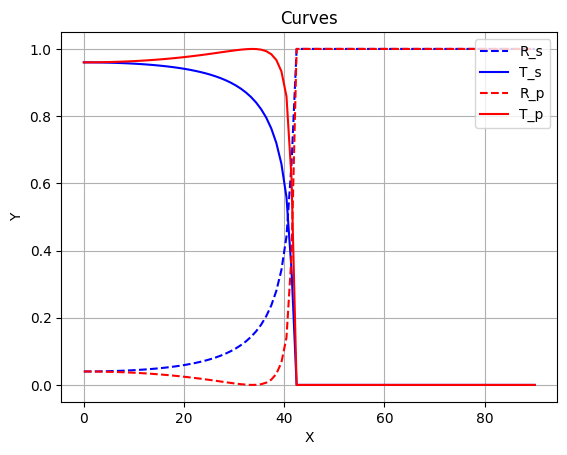

* reflection & transimition


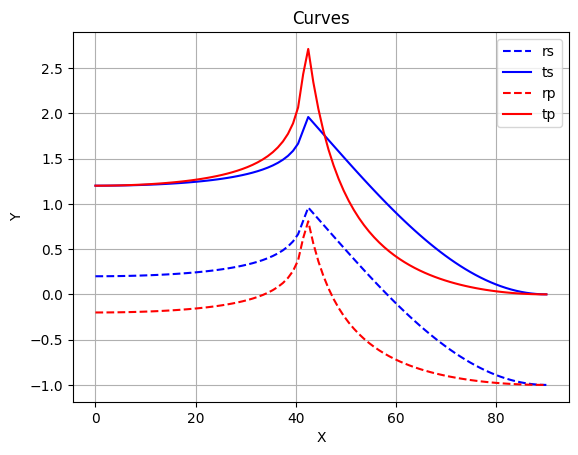

In [6]:
print("* glass to air")
def glass_to_air():
    return [glass, air]
result_glass_to_air = test_TMM_interface_matrix(glass_to_air(), 90)
plot_result(result_glass_to_air, with_unpolarized=False)


- golden result from wikipedia
<div style="display: flex; justify-content: space-around;">
    <img src="../resource/Fresnel_power_glass-to-air.svg" alt="Fresnel_power_glass-to-air" width="48%">
    <img src="../resource/Fresnel_amplitudes_glass-to-air.svg" alt="Fresnel_amplitudes_glass-to-air" width="48%">
</div>


* air to glass
* power of reflection & transimition


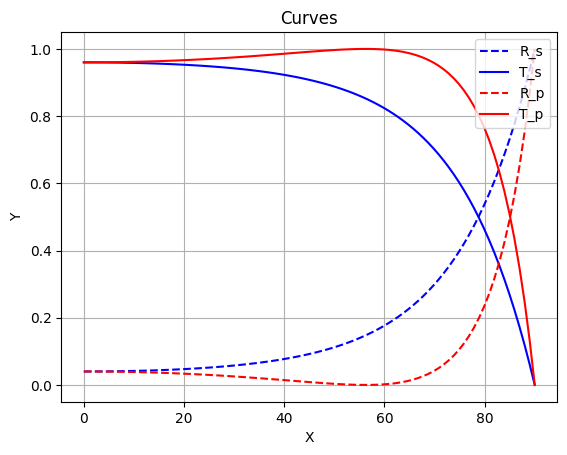

* reflection & transimition


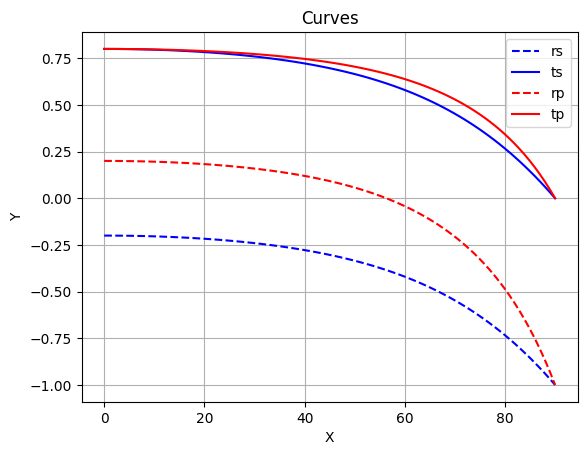

In [7]:
print("* air to glass")
def air_to_glass():
    return [air, glass]
result_air_to_glass = test_TMM_interface_matrix(air_to_glass(), 90)
plot_result(result_air_to_glass, with_unpolarized=False)

- golden result from wikipedia

<div style="display: flex; justify-content: space-around;">
    <img src="../resource/Fresnel_power_air-to-glass.svg" alt="Fresnel_amplitudes_air-to-glass" width="48%">
    <img src="../resource/Fresnel_amplitudes_air-to-glass.svg" alt="Fresnel_power_air-to-glass" width="48%">
</div>

* phase from air to glass
  brewster angle is 56.309932474020215


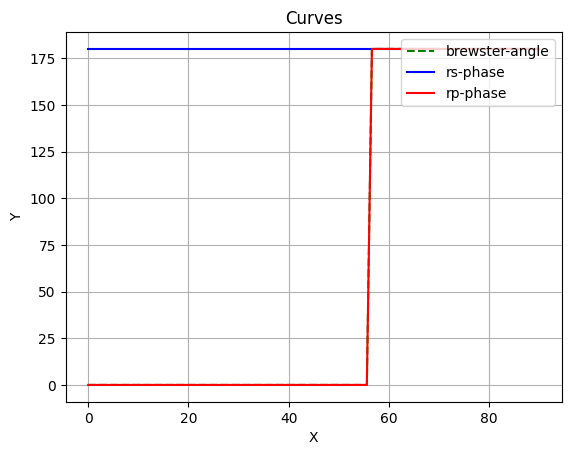

* phase from glass to air
  brewster angle is 33.690067525979785
  critical angle is 41.810314895778596
  max delta-phase is 45.23871612744304


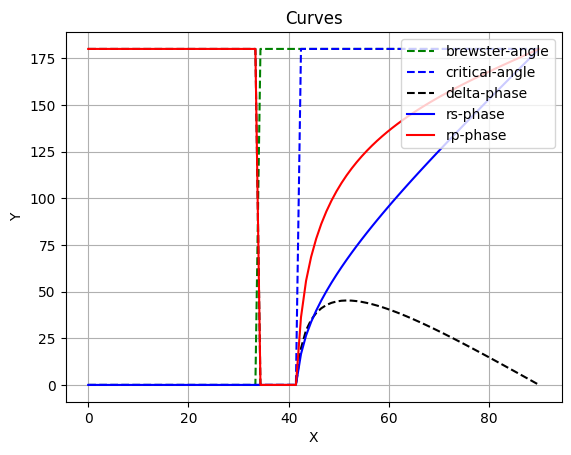

In [8]:
def brewster_angle(n0, n1):
    return 180 / pi *atan(n1/n0)
def total_internal_reflection_angle(n0, n1):
    if n1 < n0: return 180 / pi *asin(n1/n0)
    return 0

def plot_phase(result, plot_meta):
    if plot_meta:
        nk_list = [np.real(m.nk) for m in result["meterials"]]
        brewster = brewster_angle(nk_list[0], nk_list[1])
        print(f"  brewster angle is {brewster}")
        critical = total_internal_reflection_angle(nk_list[0], nk_list[1])
        if critical > 0: print(f"  critical angle is {critical}")
    N = len(result["rs_power"])

    curves = [
        result["phase_rs"], result["phase_rp"],
    ]
    legends = ["rs-phase", "rp-phase"]
    style   = ["b-", "r-"]
    if plot_meta:
        delta_phase = [b-a for a,b in zip(result["phase_rs"], result["phase_rp"])]
        max_phase = max([x for x in delta_phase if x < 180])
        if max_phase > 0 :
            print(f"  max delta-phase is {max_phase}")
            curves.insert(0, delta_phase)
            legends.insert(0, "delta-phase")
            style.insert(0, "k--")

        if critical > 0:
            curves.insert(0, [[0, 180][int(critical < i * 90.0/(N - 1))] for i in range(N)])
            legends.insert(0, "critical-angle")
            style.insert(0, "b--")

        curves.insert(0, [[0, 180][int(brewster < i * 90.0/(N - 1))] for i in range(N)])
        legends.insert(0, "brewster-angle")
        style.insert(0, "g--")

    start_x = [0 for i in range(len(curves))]
    step_x  = [90.0/(N - 1) for i in range(len(curves))]
    plot_curves(curves, start_x, step_x, legends, style)

print("* phase from air to glass")
plot_phase(result_air_to_glass, plot_meta = True)
print("* phase from glass to air")
plot_phase(result_glass_to_air, plot_meta= True)

# https://en.wikipedia.org/wiki/Fresnel_rhomb

- golden result from wikipedia

<div style="display: flex; justify-content: space-around;">
    <img src="../resource/Phase_advance_at_internal_reflection.svg" alt="Phase_advance_at_internal_reflection" width="30%">
</div>

### 参考资料
* **[Fresnel equations wikipedia](https://en.wikipedia.org/wiki/Fresnel_equations)**
* **[Fresnel rhomb wikipedia](https://en.wikipedia.org/wiki/Fresnel_rhomb)**





### 1. 物理前提：电磁场切向分量连续性

首先，我们必须认识到这个等式成立的根本原因在于**电磁场在界面上的连续性**。根据麦克斯韦方程组，当光波从介质 $j$ 传播到介质 $j+1$ 时，界面两侧的电场（$E$）和磁场（$H$）的切向分量必须是连续的。

* $E_{j, \text{切向}} = E_{j+1, \text{切向}}$
* $H_{j, \text{切向}} = H_{j+1, \text{切向}}$

### 2. 将电磁场与波振幅联系起来

在一个介质中，光波可以分解为向前传播的波（振幅 $A$）和向后传播的波（振幅 $B$）。它们与电场和磁场之间的关系如下：

* **电场**：$E = A + B$
* **磁场**：$H = \eta^{-1} (A - B)$

其中，$\eta$ 是介质的波阻抗（wave impedance），与折射率 $n$ 和入射角 $\theta$ 有关。对于 s 波（垂直偏振），$\eta = Z_0 / (n \cos\theta)$；对于 p 波（平行偏振），$\eta = Z_0 \cos\theta / n$，$Z_0$ 是真空波阻抗。

为了简化，我们可以使用一种等效的电场和磁场表示，通常称为**特性矩阵法（Characteristic Matrix Method）**：

* $E_j$: 介质 $j$ 中的电场振幅
* $H_j$: 介质 $j$ 中的磁场振幅，定义为 $H_j = Y_j E_j$，其中 $Y_j = \eta_j^{-1}$。

### 3. TMM 矩阵的推导与证明
现在，我们来证明对于一个单界面，$[a, b]^T = \mathbf{M} [c, d]^T$ 成立。这里，$M$ 实际上就是**界面传输矩阵**。

设光从介质 1 传播到介质 2。
* $A_1, B_1$：介质 1 中的向前、向后波振幅。
* $A_2, B_2$：介质 2 中的向前、向后波振幅。

根据场的连续性边界条件，在界面处：
1.  **电场连续**：$A_1 + B_1 = A_2 + B_2$
2.  **磁场连续**：$Y_1(A_1 - B_1) = Y_2(A_2 - B_2)$

这里的 $Y_1, Y_2$ 是介质 1 和 2 的光学导纳（optical admittance），与之前提到的波阻抗的倒数有关。

现在，我们可以从这两个方程推导出 $A_1, B_1$ 和 $A_2, B_2$ 之间的关系。我们将方程重新排列：

* $B_1 = A_2 + B_2 - A_1$
* $Y_1 A_1 - Y_1 B_1 = Y_2 A_2 - Y_2 B_2$

将第一个方程代入第二个方程：    
$Y_1 A_1 - Y_1 (A_2 + B_2 - A_1) = Y_2 A_2 - Y_2 B_2$    
$2Y_1 A_1 - Y_1 A_2 - Y_1 B_2 = Y_2 A_2 - Y_2 B_2$    
$2Y_1 A_1 = (Y_1 + Y_2) A_2 + (Y_1 - Y_2) B_2$    
$A_1 = \frac{1}{2Y_1} [(Y_1 + Y_2) A_2 + (Y_1 - Y_2) B_2]$    

类似地，我们可以推导出 $B_1$ 的表达式：
$B_1 = \frac{1}{2Y_1} [(Y_1 - Y_2) A_2 + (Y_1 + Y_2) B_2]$

将这两个方程写成矩阵形式：
$$\begin{pmatrix} A_1 \\ B_1 \end{pmatrix} = \frac{1}{2Y_1} \begin{pmatrix} Y_1+Y_2 & Y_1-Y_2 \\ Y_1-Y_2 & Y_1+Y_2 \end{pmatrix} \begin{pmatrix} A_2 \\ B_2 \end{pmatrix}$$

这就是**单界面传输矩阵**的形式。

接下来，我们将这个矩阵形式与菲涅尔公式联系起来。
菲涅尔反射和透射系数为：
* $r = \frac{Y_1 - Y_2}{Y_1 + Y_2}$
* $t = \frac{2Y_1}{Y_1 + Y_2}$

请注意，这里的 $r$ 和 $t$ 的定义与我之前给出的略有不同，这是因为它们取决于场的具体表示方式。但它们之间的关系是固定的：

$\frac{1}{t} = \frac{Y_1 + Y_2}{2Y_1}$
$\frac{r}{t} = \frac{(Y_1 - Y_2)/(Y_1 + Y_2)}{(2Y_1)/(Y_1 + Y_2)} = \frac{Y_1 - Y_2}{2Y_1}$

用 $r$ 和 $t$ 重新写出矩阵：
$$\begin{pmatrix} A_1 \\ B_1 \end{pmatrix} = \frac{1}{t} \begin{pmatrix} 1 & r \\ r & 1 \end{pmatrix} \begin{pmatrix} A_2 \\ B_2 \end{pmatrix}$$

这个矩阵就是我们通常所说的界面传输矩阵。它与 $[a, b]^T = \mathbf{M} [c, d]^T$ 的形式完全吻合，其中：
* $[a, b]^T = \begin{pmatrix} A_1 \\ B_1 \end{pmatrix}$
* $[c, d]^T = \begin{pmatrix} A_2 \\ B_2 \end{pmatrix}$
* $\mathbf{M} = \frac{1}{t} \begin{pmatrix} 1 & r \\ r & 1 \end{pmatrix}$

**证明结论：**

这个等式成立是因为它是一个**数学表达式**，直接来源于电磁场在界面上的**物理连续性边界条件**。通过将电场和磁场的连续性转化为波振幅的连续性，我们可以推导出描述这种关系的线性代数方程，即 TMM 的核心方程。因此，这个等式不仅仅是一个定义，而是从物理基本原理中推导出的必然结果。